## 1. Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from keras.utils.np_utils import to_categorical


## 2. Import dataset and preprocessing

In [2]:
# import dataset from github
df_raw = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv',
                 sep=',')
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df_raw.groupby('Education').mean()['Income']

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

Notes:
was not clear if 2n Cycle was a type of graduation or high school. So, a analyze of Income of each category was made. Based on results, 2n Cycle corresponds to High school, not a pos-graduation

Reference of 2nCycle graduation:

### 2.1 Preprocessing

In [4]:
df_pp = df_raw.copy()
# df_raw['Education'].value_counts() # Basic (Lower), 2n Cycle, Master, PhD, Graduation (Higher) [5 categories]
# df_raw['Marital_Status'].value_counts() # YOLO (Lower), Absurd,(Lower) Alone, Widow, Divorced, Single, Together, Married (Higher) [8 categories]

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# Categorizando coluna Education seguindo uma ordem de hierarquia crescente (Basic (0) -> PhD (4))

categories = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
ordinalEncoder = OrdinalEncoder(categories=categories)
df_pp['Education_Cat'] = ordinalEncoder.fit_transform(df_raw['Education'].values.reshape(-1, 1))
df_pp['Education_Cat'] = df_pp['Education_Cat'].astype(int)


In [6]:
# Categorizando coluna Marital Status utilizando get_dummies, já que a ordem das categorias não é importante
df_pp = pd.get_dummies(df_pp, columns=['Marital_Status'], prefix=['Marital_Type'])
df_pp['Marital_Status'] = df_raw['Marital_Status']


## 3. Exploratory Analysis
Notes:
1. shape = (2240,29)
2. Income has NaN values
3. Categorical Ordinal features: Education
4. Categorical Nominal features: Martial_Status
5. Numerical data: All other features



### 3.1 Let's see quantity of samples that has Income = NaN (None)

In [7]:
df_pp[df_pp['Income'].isnull()]

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status
10,1994,1983,Graduation,NaN,1,0,2013-11-15,11,5,5,...,2,0,0,0,1,0,0,0,0,Married
27,5255,1986,Graduation,NaN,1,0,2013-02-20,19,5,1,...,2,0,0,0,0,1,0,0,0,Single
43,7281,1959,PhD,NaN,0,0,2013-11-05,80,81,11,...,4,0,0,0,0,1,0,0,0,Single
48,7244,1951,Graduation,NaN,2,1,2014-01-01,96,48,5,...,2,0,0,0,0,1,0,0,0,Single
58,8557,1982,Graduation,NaN,1,0,2013-06-17,57,11,3,...,2,0,0,0,0,1,0,0,0,Single
71,10629,1973,2n Cycle,NaN,1,0,2012-09-14,25,25,3,...,1,0,0,0,1,0,0,0,0,Married
90,8996,1957,PhD,NaN,2,1,2012-11-19,4,230,42,...,4,0,0,0,1,0,0,0,0,Married
91,9235,1957,Graduation,NaN,1,1,2014-05-27,45,7,0,...,2,0,0,0,0,1,0,0,0,Single
92,5798,1973,Master,NaN,0,0,2013-11-23,87,445,37,...,3,0,0,0,0,0,1,0,0,Together
128,8268,1961,PhD,NaN,0,1,2013-07-11,23,352,0,...,4,0,0,0,1,0,0,0,0,Married


Notes:


### 3.2. Analyzing 10 samples (5 with target = 1 and 5 with target = 0)
Objective: find nice features and bad features. Maybe remove features to use better data

In [8]:
# df_plus_age = df_pp.copy()
# df_plus_age['Age'] = df_pp.apply(lambda x: 2014 - x['Year_Birth'], axis=1)
# samples = df_plus_age.sort_values(by=['Response'], ascending=False).groupby('Response').head(5)
# samples

Notes (Initial hypotheses):
- Columns correlated to Response: MntFruits,Meat,Fish,Hold; NumWebPurchases,CatalogPurchases; Education; Marital_Status
- Only 2 negative customers accepted the Campaign2
- None insight was found with positive customers related to older Campaigns

### 3.3 Lets see the statistics about data

In [9]:
df_pp.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.149107,2.460268,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.356274,1.004337,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Notes:


### 3.4 Lets see the balancement of the dataset

In [10]:
df_pp['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Notes:
- The dataset is imbalanced
- Percentage of customers that responded to campaign: 15%
- Percentage of customers that not responded to campaign: 85%
- Therefore, the future model will be good to predict a customer that will not respond to a campaign and be bad to predict if customer will respond to campaign

### 3.4 Lets see the mean of each column based on label

In [11]:
df_3_4 = df_pp.groupby('Response').mean()
df_3_4




,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_Revenue,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO
Response,,,,,,,,,,,,,,,,,,,,,
0,5622.009444,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,...,11.0,2.418678,0.000525,0.001049,0.096537,0.401889,0.196222,0.272823,0.030430,0.000525
1,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,11.0,2.697605,0.002994,0.002994,0.143713,0.293413,0.317365,0.179641,0.056886,0.002994


Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

## 4. Visualizations
Let's drop columns that does not give information


In [12]:
df_4 = df_pp.copy()
df_4 = df_4.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
df_4

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status
0,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,546,...,2,0,0,0,0,1,0,0,0,Single
1,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,6,...,2,0,0,0,0,1,0,0,0,Single
2,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,127,...,2,0,0,0,0,0,1,0,0,Together
3,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,20,...,2,0,0,0,0,0,1,0,0,Together
4,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,118,...,4,0,0,0,1,0,0,0,0,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,61223.0,0,1,2013-06-13,46,709,43,182,...,2,0,0,0,1,0,0,0,0,Married
2236,1946,PhD,64014.0,2,1,2014-06-10,56,406,0,30,...,4,0,0,0,0,0,1,0,0,Together
2237,1981,Graduation,56981.0,0,0,2014-01-25,91,908,48,217,...,2,0,0,1,0,0,0,0,0,Divorced
2238,1956,Master,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,1,0,0,Together


### 4.1 Univariate Plot

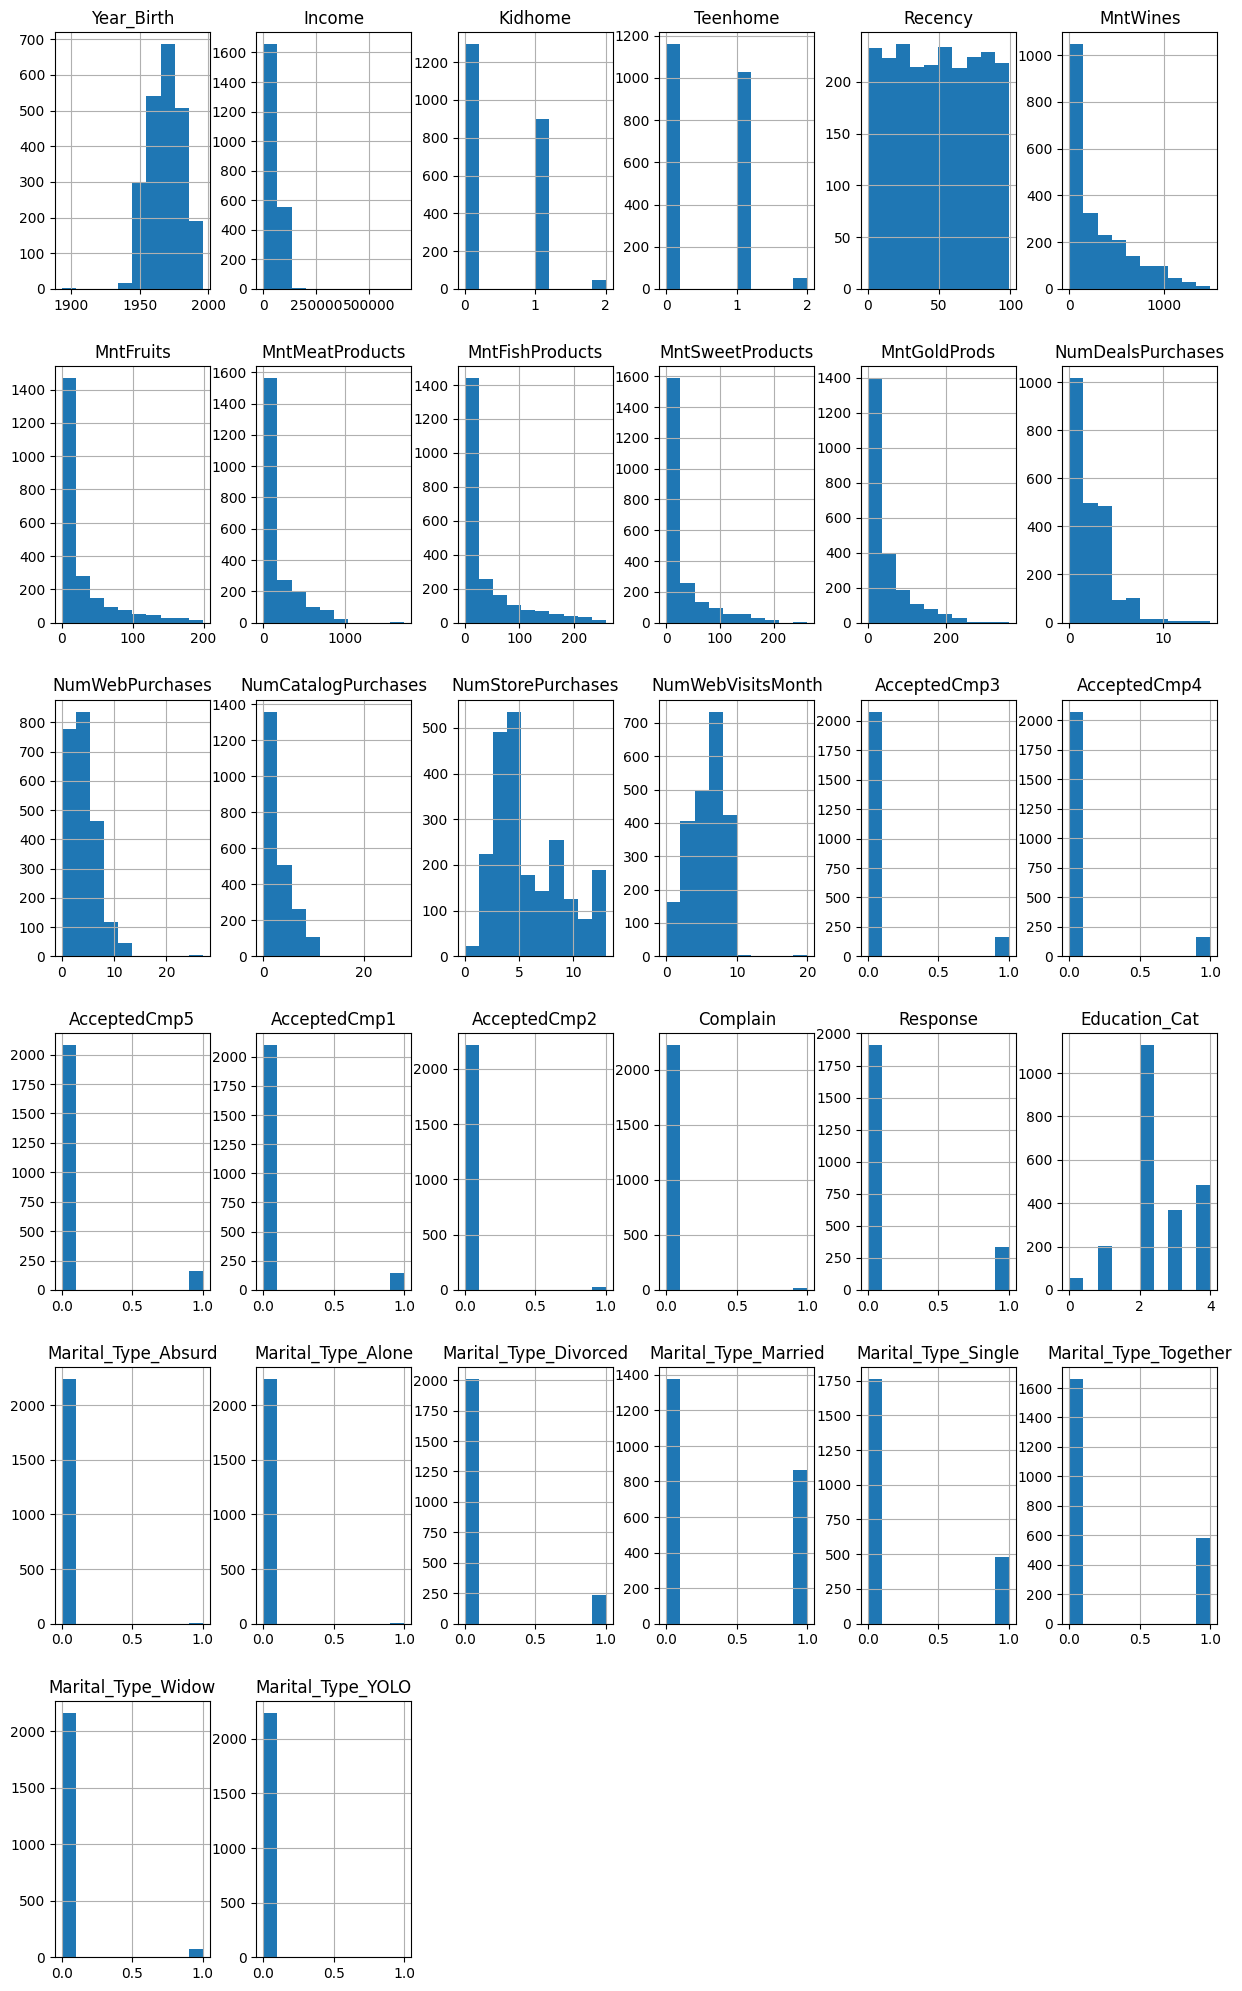

In [13]:
df_4.hist(figsize=(15, 25))
plt.show()

### 4.2 Multivariate Plot


Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

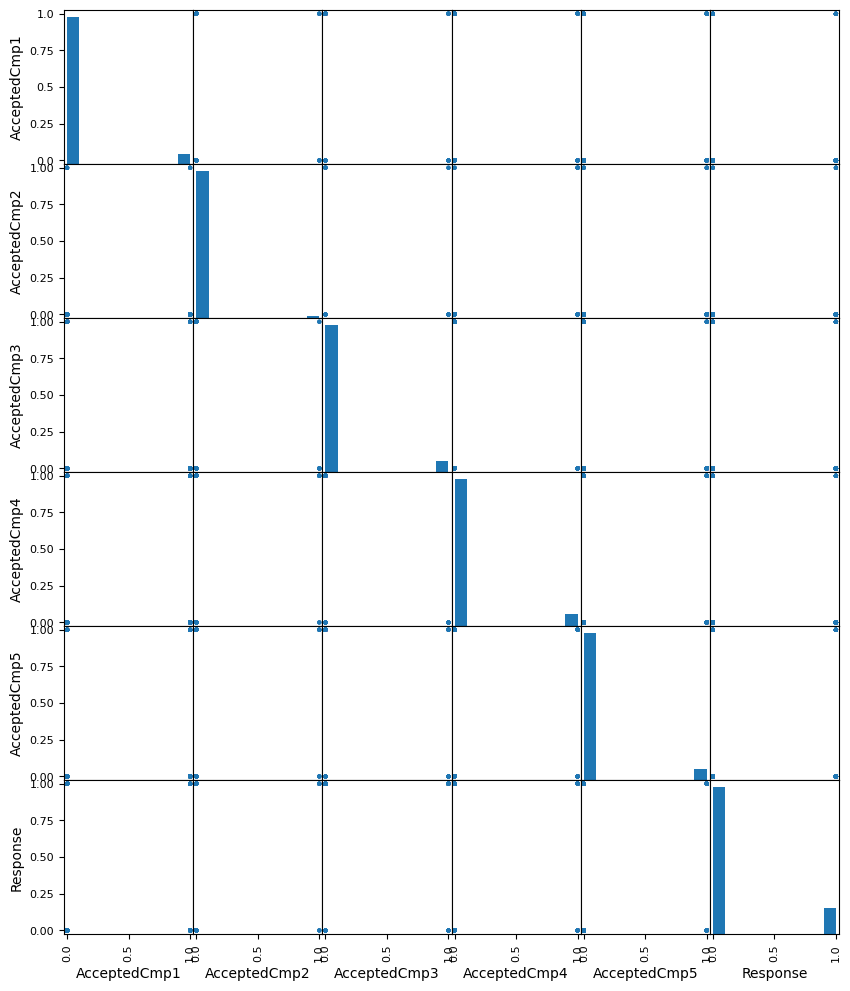

In [14]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

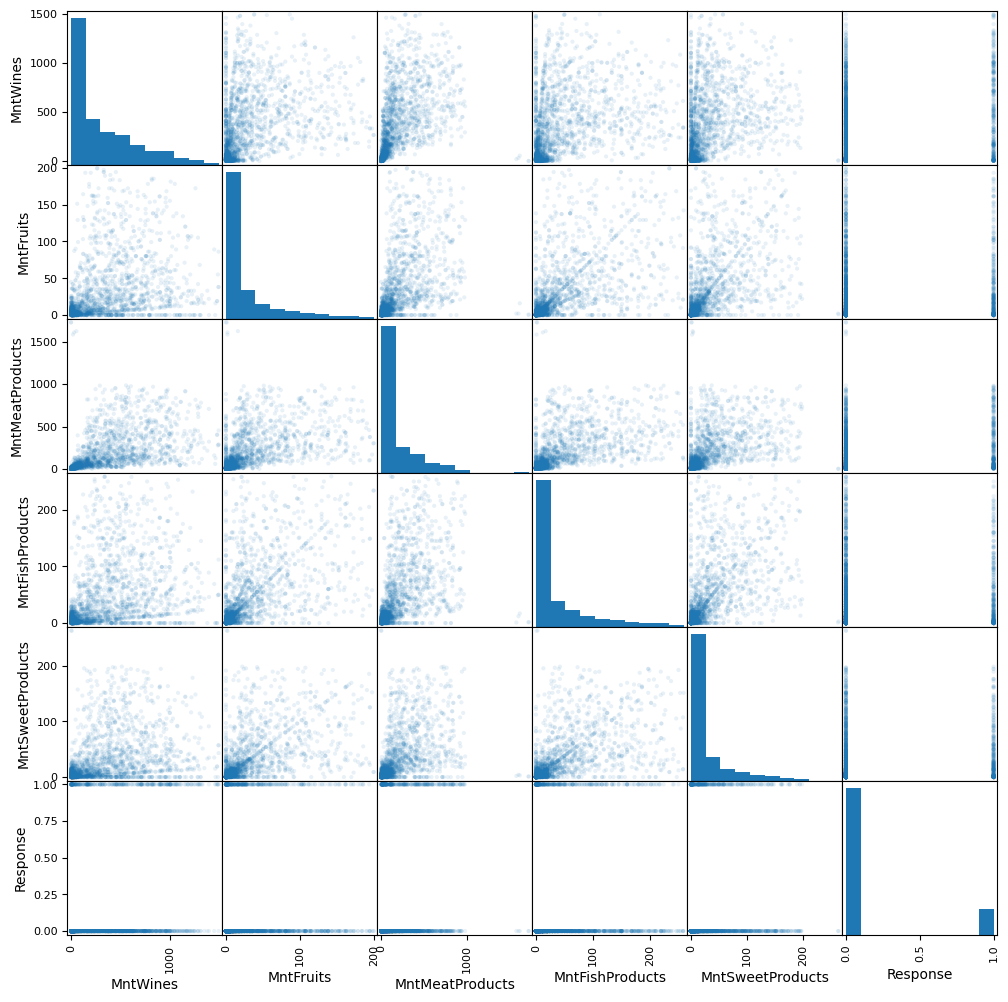

In [15]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Response']]
scatter_matrix(df_4_2, figsize=(12, 12),alpha=0.1)
plt.show()

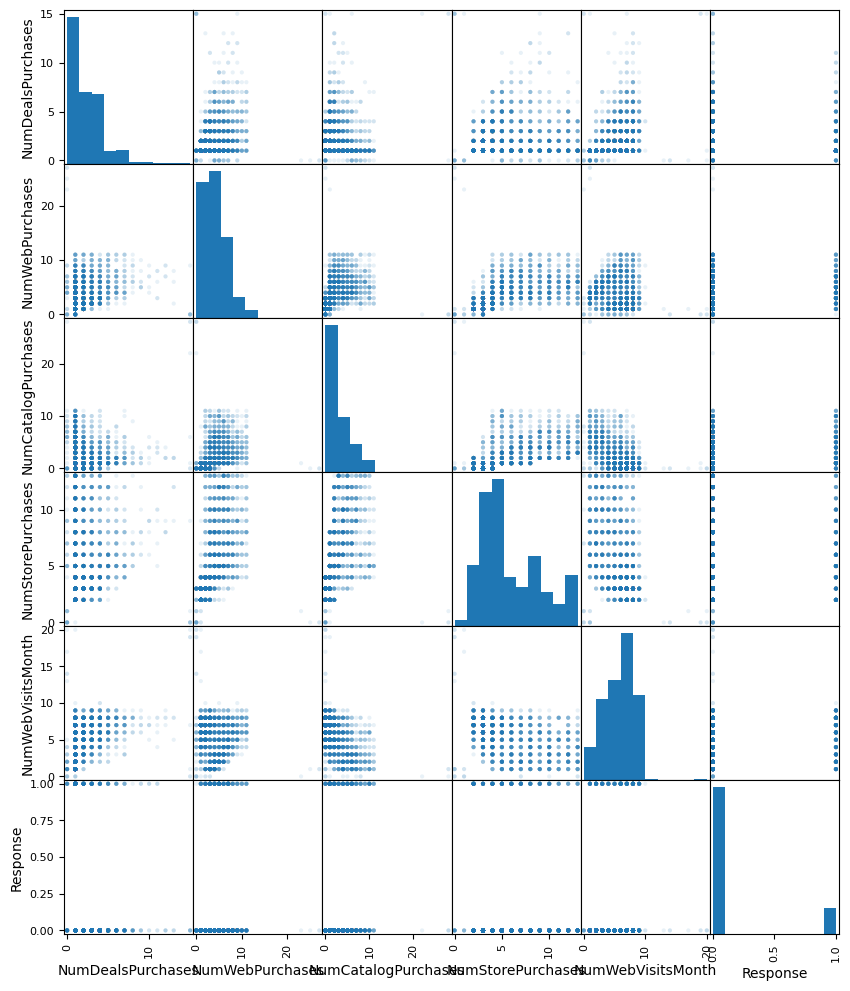

In [16]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['NumDealsPurchases', 'NumWebPurchases',
                        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12),alpha=0.1)
plt.show()

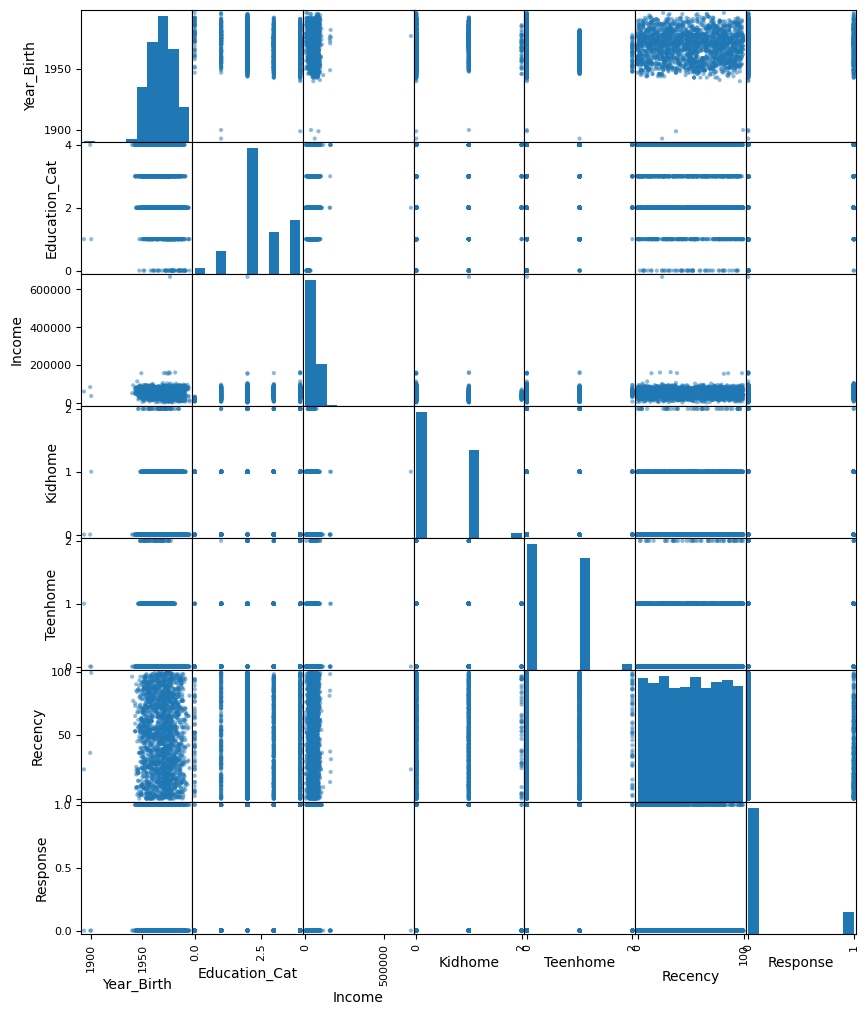

In [19]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['Year_Birth', 'Education_Cat', 'Income', 'Kidhome',
                        'Teenhome', 'Dt_Customer', 'Recency', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

Notes:
- Can be said that Higher Wine and Meet, higher the chance that is a positive costumer
- Can be said that higher fish, higher fruits and wine
- Can be said that higher wine, higher meat and sweets
- Can be said that lower the store purchases, higher the chance that is a negative costumer

### 4.3 Confirming notes above using corr()

In [20]:
corr = df_pp.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.021968,-0.002962,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.021325,-0.185047,0.015455,0.012819,-0.071774,0.051193,0.116978,-0.052258,-0.161370,0.010465
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.133047,0.149338,0.024026,-0.012374,0.007975,-0.016479,-0.025843,0.023425,0.031706,-0.004556
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.080008,-0.053660,-0.024669,0.037813,-0.019199,0.017403,0.019779,0.006373,-0.073760,-0.024669
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,-0.154446,0.134794,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.198437,-0.014737,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.247254,0.214077,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.125289,-0.074862,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.236335,0.043926,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.111331,-0.100230,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350


TODO:
1. Ver quais são as features mais correlacionadas ao Response
2. Ver quais features são mais correlacionadas as features que são correlacionadas ao Response

###